In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler


In [5]:
df=pd.read_csv('GOOGLE Stock Data set.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [9]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
data=df[['Close']]


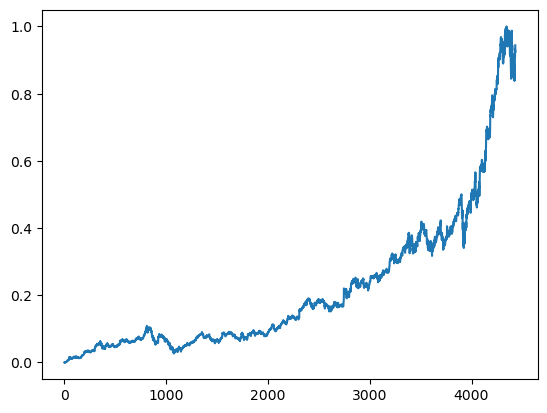

In [15]:
scaled_data = scaler.fit_transform(data)
plt.plot(scaled_data)


In [26]:
def create(time,scaled_data):
    x,y=[],[]
    for i in range(time,len(scaled_data)):
        x.append(scaled_data[i-time:i,0])
        y.append(scaled_data[i,0])
    return np.asarray(x),np.asarray(y)
x,y=create(60,scaled_data)
x=x.reshape(x.shape[0],x.shape[1],1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)


In [57]:
from keras.layers import Input

model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))

model.add(SimpleRNN(units=40, return_sequences=True))
model.add(SimpleRNN(units=20, return_sequences=True))
model.add(SimpleRNN(units=10, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_18 (SimpleRNN)       │ (None, 60, 40)         │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_19 (SimpleRNN)       │ (None, 60, 20)         │         1,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_20 (SimpleRNN)       │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,221 (12.58 KB)

 Trainable params: 3,221 (12.58 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history=model.fit(x_train,y_train,epochs=40,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0679 - val_loss: 0.1228
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0020 - val_loss: 0.0321
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1040e-04 - val_loss: 0.0281
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 8.5272e-05 - val_loss: 0.0241
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.7560e-05 - val_loss: 0.0216
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.9935e-05 - val_loss: 0.0201
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.6309e-05 - val_loss: 0.0187
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.2660e-05 - val_loss: 0.0177
Epoch 9/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7394e-05 - val_loss: 0.0173
Epoch 10/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.8662e-05 - val_loss: 0.0161
Epoch 11/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.7236e-05 - val_loss: 0.0150
Epoch 12/40
55/55 ━━━━━━━━━

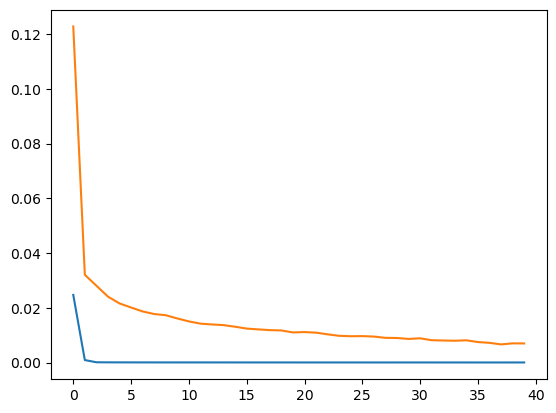

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [53]:
y_predict=model.predict(x_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


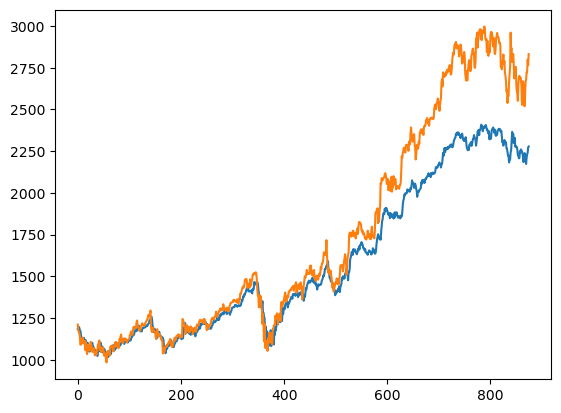

In [55]:
y_predict=scaler.inverse_transform(y_predict)
y_actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_predict)
plt.plot(y_actual)